In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model,Model
from keras.layers import Dense,Dropout,BatchNormalization,Flatten,Input,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

2023-12-05 20:37:00.780220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load Data

In [2]:
path='UTKFace'
images=[]
age=[]
gender=[]
for img in os.listdir(path):
    ages=img.split("_")[0]
    genders=img.split("_")[1]
    img=cv2.imread(str(path)+'/'+str(img))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(np.array(img))
    age.append(np.array(ages))
    gender.append(np.array(genders))

In [3]:
len(images),len(age),len(gender),type(gender)

(23708, 23708, 23708, list)

(<matplotlib.image.AxesImage at 0x7ff386bfd3d0>, (200, 200, 3))

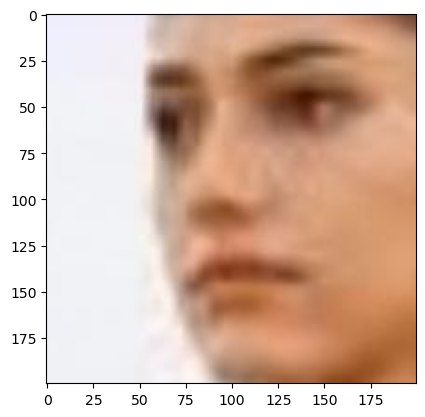

In [4]:
plt.imshow(images[3]),images[3].shape

In [5]:
age=np.array(age,dtype=np.int64)
images=np.array(images)
images=images/255
gender=np.array(gender,dtype=np.uint64)

In [6]:
type(gender)

numpy.ndarray

In [7]:
images[3].shape

(200, 200, 3)

## Train-Test split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(images,gender,random_state=42)

## Model

In [9]:
model=Sequential()
model.add(Conv2D(36,kernel_size=(3,3),activation='relu',
                input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid',name='gender'))

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 36)      1008      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

## Training

In [12]:
history_gender=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4)

Epoch 1/4
556/556 [==============================] - 673s 1s/step - loss: 0.5543 - accuracy: 0.7076 - val_loss: 0.4097 - val_accuracy: 0.8252
Epoch 2/4
556/556 [==============================] - 718s 1s/step - loss: 0.3618 - accuracy: 0.8372 - val_loss: 0.3149 - val_accuracy: 0.8632
Epoch 3/4
556/556 [==============================] - 709s 1s/step - loss: 0.3091 - accuracy: 0.8638 - val_loss: 0.2864 - val_accuracy: 0.8770
Epoch 4/4
556/556 [==============================] - 611s 1s/step - loss: 0.2817 - accuracy: 0.8771 - val_loss: 0.2791 - val_accuracy: 0.8805


## Save Model

In [15]:
model.save('Gender_Detection_CNN_4epochs.h5')

In [3]:
my_model=load_model('Gender_Detection_CNN_4epochs.h5',compile=False)

In [12]:
predictions=my_model.predict(X_test)
y_pred=(predictions>=0.5).astype(int)[:,0]

186/186 [==============================] - 59s 310ms/step


In [20]:
acc=accuracy_score(y_test,y_pred)
acc

0.8805466509195209

<Axes: >

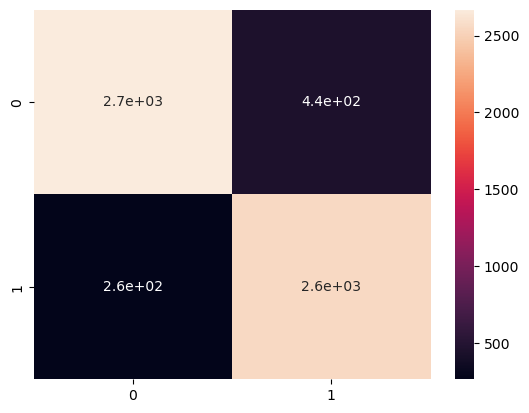

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      3114
           1       0.85      0.91      0.88      2813

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



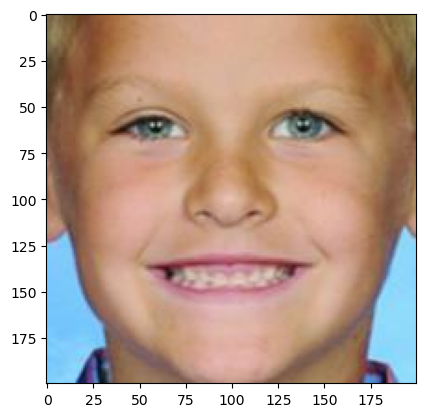

In [25]:
plt.imshow(X_test[0])

In [29]:
#0-boy 1-girl
y_test[0]

0

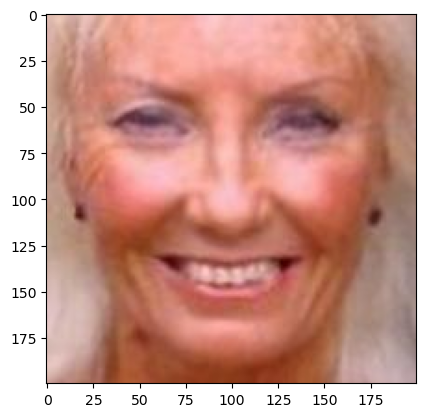

In [30]:
plt.imshow(X_test[1])

In [31]:
y_test[1]

1